# Module - 4

Logistic Regression

In [1]:
import pandas as p
import numpy as n
import matplotlib.pyplot as plt
import seaborn as s

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=p.read_csv('churn.csv')

In [4]:
data.columns

Index(['Customer ID', 'Gender', 'Age', 'Zip Code', 'Latitude', 'Longitude',
       'Tenure in Months', 'Offer', 'Internet Type', 'Avg Monthly GB Download',
       'Unlimited Data', 'Contract', 'Payment Method', 'Monthly Charge',
       'Total Charges', 'Total Extra Data Charges', 'Total Revenue',
       'Customer Status'],
      dtype='object')

In [5]:
del data['Customer ID']
del data['Gender']
del data['Zip Code']
del data['Latitude']
del data['Longitude']
del data['Total Charges']
del data['Total Revenue']

In [6]:
df=data.dropna()

In [7]:
data['Customer Status'].value_counts()

Stayed     4720
Churned    1869
Joined      454
Name: Customer Status, dtype: int64

In [8]:
df.drop(df.index[df['Customer Status'] == 'Joined'], inplace=True)

In [9]:
df['Customer Status'].value_counts()

Stayed     3489
Churned    1756
Name: Customer Status, dtype: int64

In [10]:
df = df.rename({'Tenure in Months': 'Tenure_in_Months', 'Internet Service': 'Internet_Service',
                'Internet Type': 'Internet_Type', 'Avg Monthly GB Download': 'Avg_Monthly_GB_Download',
                'Unlimited Data': 'Unlimited_Data', 'Payment Method': 'Payment_Method',
                'Monthly Charge': 'Monthly_Charge', 'Total Charges': 'Total_Charges',
                'Total Extra Data Charges': 'Total_Extra_Data_Charges', 'Customer Status': 'Customer_Status'}, axis=1)

In [11]:
df.head()

,Age,Tenure_in_Months,Offer,Internet_Type,Avg_Monthly_GB_Download,Unlimited_Data,Contract,Payment_Method,Monthly_Charge,Total_Extra_Data_Charges,Customer_Status
0,37,9,None,Cable,16.0,Yes,One Year,Credit Card,65.6,0,Stayed
1,46,9,None,Cable,10.0,No,Month-to-Month,Credit Card,-4.0,10,Stayed
2,50,4,Offer E,Fiber Optic,30.0,Yes,Month-to-Month,Bank Withdrawal,73.9,0,Churned
3,78,13,Offer D,Fiber Optic,4.0,Yes,Month-to-Month,Bank Withdrawal,98.0,0,Churned
4,75,3,None,Fiber Optic,11.0,Yes,Month-to-Month,Credit Card,83.9,0,Churned


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5245 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       5245 non-null   int64  
 1   Tenure_in_Months          5245 non-null   int64  
 2   Offer                     5245 non-null   object 
 3   Internet_Type             5245 non-null   object 
 4   Avg_Monthly_GB_Download   5245 non-null   float64
 5   Unlimited_Data            5245 non-null   object 
 6   Contract                  5245 non-null   object 
 7   Payment_Method            5245 non-null   object 
 8   Monthly_Charge            5245 non-null   float64
 9   Total_Extra_Data_Charges  5245 non-null   int64  
 10  Customer_Status           5245 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 491.7+ KB


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

var = ['Offer', 'Internet_Type', 'Unlimited_Data', 'Contract', 'Payment_Method', 'Customer_Status']

for i in var:
    df[i] = le.fit_transform(df[i]).astype(int)

In [14]:
df

,Age,Tenure_in_Months,Offer,Internet_Type,Avg_Monthly_GB_Download,Unlimited_Data,Contract,Payment_Method,Monthly_Charge,Total_Extra_Data_Charges,Customer_Status
0,37,9,0,0,16.0,1,1,1,65.60,0,1
1,46,9,0,0,10.0,0,0,1,-4.00,10,1
2,50,4,5,2,30.0,1,0,0,73.90,0,0
3,78,13,4,2,4.0,1,0,0,98.00,0,0
4,75,3,0,2,11.0,1,0,1,83.90,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7036,53,1,5,2,9.0,1,0,1,70.15,0,0
7038,20,13,4,1,59.0,1,1,1,55.15,0,1
7039,40,22,4,2,17.0,1,0,0,85.10,0,0
7041,21,67,1,0,58.0,1,2,1,67.85,0,1


In [15]:
#preprocessing, split test and dataset, split response variable
X = df.drop(labels='Customer_Status', axis=1)
#Response variable
y = df.loc[:,'Customer_Status']

In [16]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=42)
x_ros,y_ros=ros.fit_resample(X,y)
print("OUR DATASET COUNT         : ", Counter(y))
print("OVER SAMPLING DATA COUNT  : ", Counter(y_ros))

OUR DATASET COUNT         :  Counter({1: 3489, 0: 1756})
OVER SAMPLING DATA COUNT  :  Counter({1: 3489, 0: 3489})


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.30, random_state=1, stratify=y_ros)
print("Number of training dataset : ", len(X_train))
print("Number of test dataset     : ", len(X_test))
print("Total number of dataset    : ", len(X_train)+len(X_test))

Number of training dataset :  4884
Number of test dataset     :  2094
Total number of dataset    :  6978


Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, plot_confusion_matrix

Training Process

In [19]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
predicted_lr = lr.predict(X_test)

Getting Accuracy

In [20]:
accuracy = accuracy_score(y_test,predicted_lr)
print('Accuracy of Logistic Regression is: ',accuracy*100)

Accuracy of Logistic Regression is:  77.22063037249283


Finding Classification Report

In [21]:
cr = classification_report(y_test,predicted_lr)
print('Classification report\n---------------------\n',cr)

Classification report
---------------------
               precision    recall  f1-score   support

           0       0.74      0.83      0.78      1047
           1       0.81      0.71      0.76      1047

    accuracy                           0.77      2094
   macro avg       0.78      0.77      0.77      2094
weighted avg       0.78      0.77      0.77      2094



Finding Confusion Matrix

In [22]:
cm = confusion_matrix(y_test,predicted_lr)
print('Confusion matrix\n----------------\n',cm)

Confusion matrix
----------------
 [[870 177]
 [300 747]]


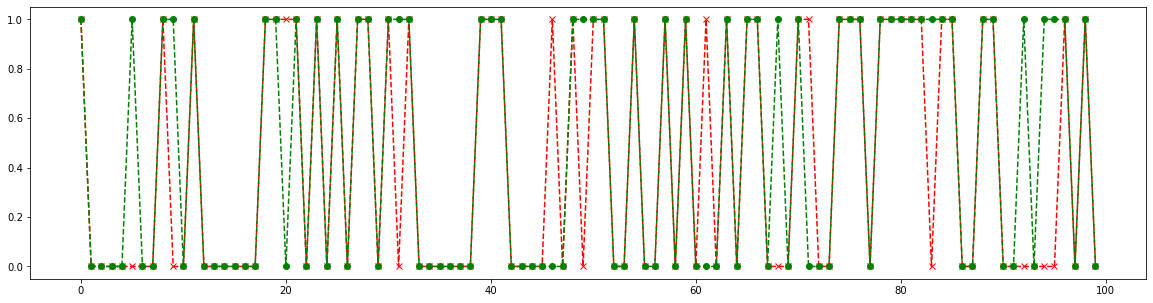

In [23]:
DF = p.DataFrame()
DF["y_test"] = y_test
DF["predicted"] = predicted_lr
DF.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(DF["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(DF["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()